<a href="https://colab.research.google.com/github/rasminair/spotify-track-analysis-py/blob/main/Proj_Spotify_Track_Popularity_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GOAL**: **Spotify** has become the one stop solution to listing to music. Analysing the reason for the popularity of Spotify.

In [ ]:
# Step 1: Import necessary libraries
import numpy as np # numerical python
import pandas as pd # assess dataset
import matplotlib.pyplot as plt # Data visualization - graph
import seaborn as sns # better visualization and analysis more interactive graphs

In [ ]:
# Step 2: Load the data
file_path = "/content/spotify-dataset.csv"
spotify_data = pd.read_csv(file_path)


In [ ]:
spotify_data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
# Start processing. Check missing values
spotify_data.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [ ]:
# Remove the null data.
spotify_data_cleaned = spotify_data.dropna()

In [ ]:
spotify_data_cleaned.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


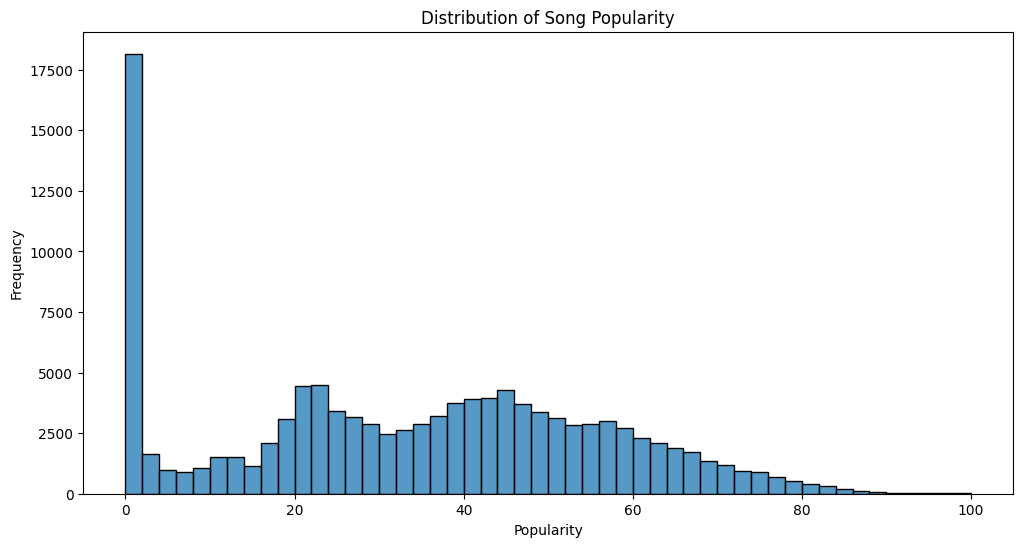

In [ ]:
#Exploratory Data Analysis
plt.figure(figsize=(12,6))
sns.histplot(spotify_data_cleaned['popularity'], bins=50)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

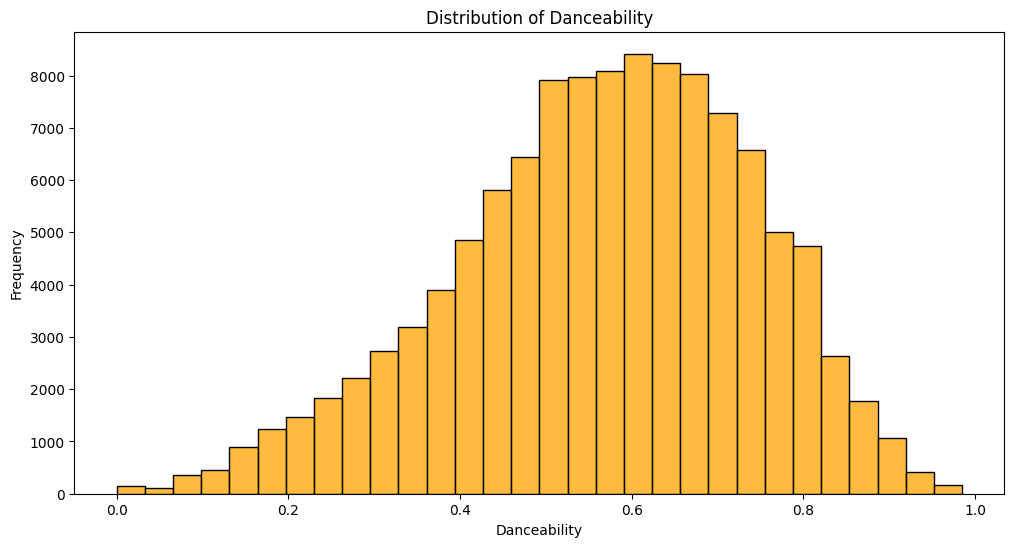

In [ ]:
#Exploratory Data Analysis for Danceability
plt.figure(figsize=(12,6))
sns.histplot(spotify_data_cleaned['danceability'], bins=30, color='orange')
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.show()

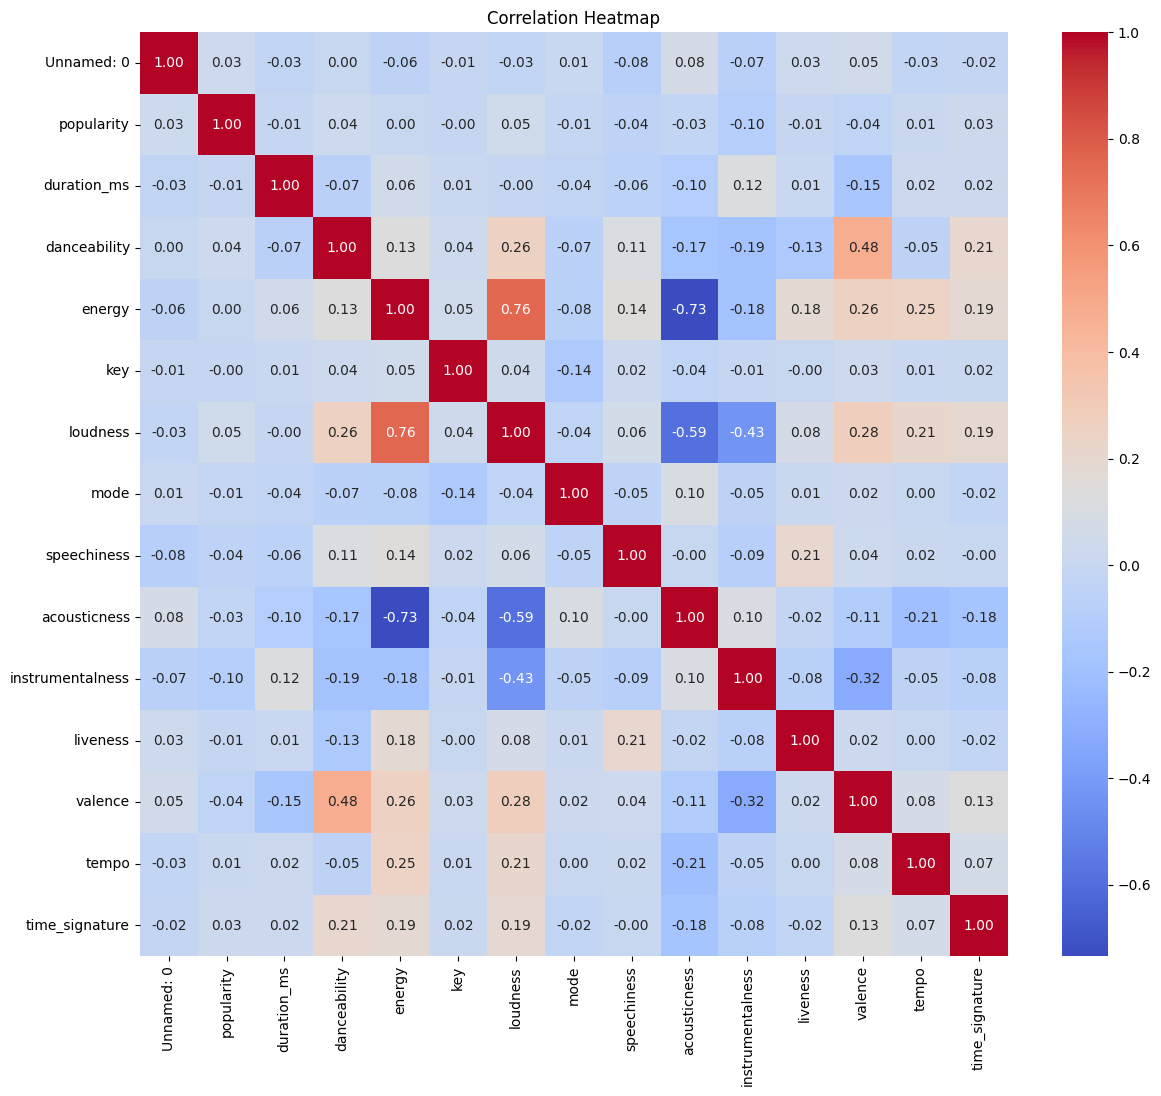

In [ ]:
# Correlation Analysis - Relation between 2 entities / features
# How does the popularity of the song depend upon different metrics

numeric_spotify_data = spotify_data_cleaned.select_dtypes(include = [np.number]) # Require only numeric data
correlation_matrix = numeric_spotify_data.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f') #intro heatmap and 2 decimal places
plt.title('Correlation Heatmap')
plt.show()

# Conclusion<br>
<ol><li><b>Popularity Distribution</b></li>

*   Most tracks cluster around moderate popularity levels.
*   Extremely high or low popularity scores are less common, indicating a broad spread where only a small share of songs truly stand out.

<li><b>Danceability & Other Distributions</b></li>
 Danceability, energy, and loudness vary widely, suggesting no single audio feature dominates the dataset. However, upbeat characteristics tend to appear in moderately popular tracks.

<li><b>Correlation Insights</b></li>
  <b>Loudness</b> and <b>energy</b> show a strong <b>positive</b> correlation, implying that louder songs are usually more energetic.
  <b>Acousticness</b> and <b>energy</b> are strongly <b>negative</b>, meaning highly acoustic tracks are often less energetic.
  <b>Popularity</b> itself does <b>not</b> have a single standout correlation with any one feature, indicating <b>multiple factors impact</b> a song’s success.
  <li><b>Random Forest Feature Imortance</b></li>
  <b>Acousticness, tempo,</b> and <b>duration_ms</b> emerged as top contributors to predicting popularity, followed by <b>danceability</b>, <b>valence,</b> and <b>peechiness</b>.
  <b>Key, mode,</b> and <b>time_signature</b> have relatively low influence.
  This suggests that while energy and loudness correlate with each other, acousticness and tempo (among others) may be more critical in driving popularity scores.
  <li><b>Predictive Model Performance</b></li>
  The Random Forest Regressor can predict popularity <i>reasonably well</i>, but no single feature fully explains a track’s success. External factors (marketing, artist fan base, etc.) also likely play a role.







---

